# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [14]:
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)

In [15]:
# cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

# try:
#    del X_train, y_train
#    del X_test, y_test
#    print('Clear previously loaded data.')
# except:
#    pass

# X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# print('Training data shape: ', X_train.shape)
# print('Training labels shape: ', y_train.shape)
# print('Test data shape: ', X_test.shape)
# print('Test labels shape: ', y_test.shape)

1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



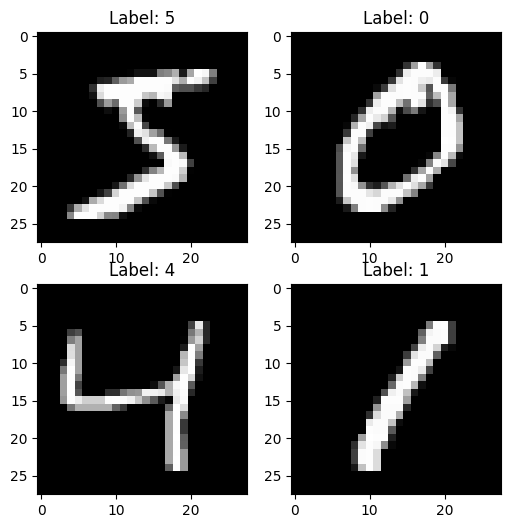

In [16]:
plt.figure(figsize=[6,6])
for fold in range(4):
    plt.subplot(2,2,fold+1)
    plt.title("Label: %i"%y_train[fold])
    plt.imshow(X_train[fold].reshape([28,28]),cmap='gray');

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [17]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)

1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [18]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train[:2000], y_train[:2000])

1.5 Выполните классификацию на тестовой выборке

In [19]:
y_preds = classifier.predict_labels(X_test[:200], k = 3)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


In [21]:
classifier.compute_distances_one_loop(X_test[:200])

array([[113.01953125, 134.97265625, 115.91796875, ..., 125.12109375,
        117.37109375, 132.078125  ],
       [153.07421875, 161.16015625, 165.80078125, ..., 111.01953125,
        139.64453125, 151.71875   ],
       [105.8515625 , 124.8671875 , 107.109375  , ...,  81.125     ,
         94.28125   ,  96.64453125],
       ...,
       [109.0703125 , 131.5859375 , 153.6796875 , ..., 120.6953125 ,
         92.2890625 , 134.78515625],
       [130.078125  , 151.1328125 , 113.109375  , ..., 113.046875  ,
         69.234375  , 110.18359375],
       [110.53125   , 137.7265625 , 166.9375    , ..., 139.7421875 ,
        116.953125  , 136.61328125]])


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test[:200],y_preds)

0.145

1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [22]:
accuracy = [accuracy_score(y_test[:200],classifier.predict_labels(X_test[:200], k = i)) for i in range(1,300)]

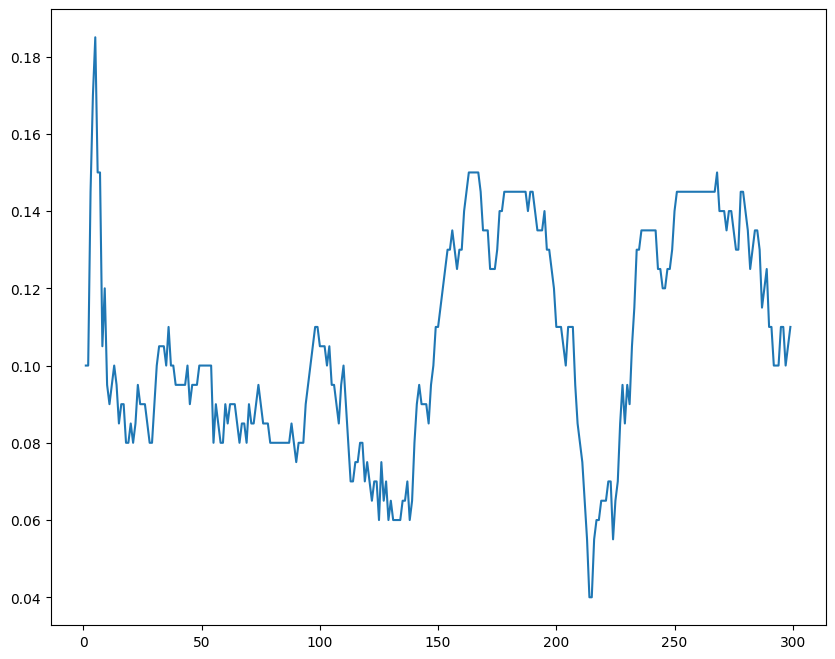

In [23]:
plt.plot(range(1,300),accuracy)

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [28]:
n_splits = 5
X = X_train[:2000]
y = y_train[:2000]
classifier = KNearestNeighbor()
cv_res = []
for k in range(1,300):
    cv_accuracy = 0
    for fold in range(n_splits):
        X_validate = X[int(fold*X.shape[0]/n_splits):int((fold+1)*X.shape[0]/n_splits)]
        X_t = np.concatenate((X[:int(fold*X.shape[0]/n_splits)],X[int((fold+1)*X.shape[0]/n_splits):]))
        y_validate = y[int(fold*y.shape[0]/n_splits):int((fold+1)*y.shape[0]/n_splits)]
        y_t = np.concatenate((y[:int(fold*y.shape[0]/n_splits)],y[int((fold+1)*y.shape[0]/n_splits):]))
        
        classifier.train(X_t, y_t)
        cv_accuracy += accuracy_score(y_validate, classifier.predict_labels(X_validate, k = k))
    cv_res.append((cv_accuracy/n_splits,k))
sorted(cv_res,reverse=True)[0] 

(0.125, 5)


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [29]:
classifier.train(X, y)
y_preds = classifier.predict_labels(X_test[:200], k = 5)
accuracy_score(y_test[:200],y_preds)

0.185

1.11 Сделайте выводы по результатам 1 части задания.

Классификатор KNN не эффективен для решения задачи классификации изображений

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

In [ ]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [ ]:

from scripts.classifiers.linear_svm import svm_loss_naive
import time


W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))


2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [ ]:

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [ ]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [ ]:
from scripts.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

In [ ]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [15]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

2.9 Сделайте выводы по второй части задания

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)

3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


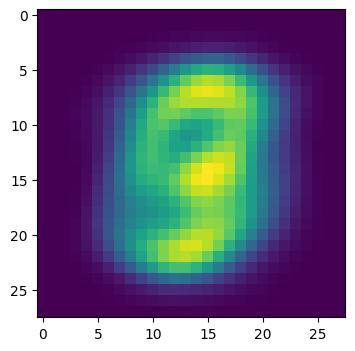

(50000, 785) (10000, 785) (10000, 785)


In [2]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((28,28,1))) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [3]:

from scripts.classifiers.softmax import softmax_loss_naive
import time
X_dev, y_dev = X_train[4000:5000], y_train[4000:5000]
# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(785, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.293849
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [4]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -0.004874 analytic: 0.000000, relative error: 1.000000e+00
numerical: -0.013873 analytic: -0.000000, relative error: 1.000000e+00
numerical: 0.003686 analytic: 0.000000, relative error: 1.000000e+00
numerical: -0.001637 analytic: 0.000000, relative error: 1.000000e+00
numerical: -0.005257 analytic: 0.000000, relative error: 1.000000e+00
numerical: 0.014807 analytic: -0.000000, relative error: 1.000000e+00
numerical: 0.011507 analytic: 0.000000, relative error: 1.000000e+00
numerical: -0.013248 analytic: -0.000000, relative error: 1.000000e+00
numerical: -0.002267 analytic: 0.000000, relative error: 1.000000e+00
numerical: 0.012922 analytic: 0.000000, relative error: 1.000000e+00
numerical: -0.003667 analytic: -0.000000, relative error: 1.000000e+00
numerical: -0.013085 analytic: -0.000000, relative error: 1.000000e+00
numerical: -0.000541 analytic: -0.000000, relative error: 1.000000e+00
numerical: -0.000589 analytic: 0.000000, relative error: 1.000000e+00
numerical: -0.0009

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [ ]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [13]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

3.10 Сделайте выводы по третьей части задания